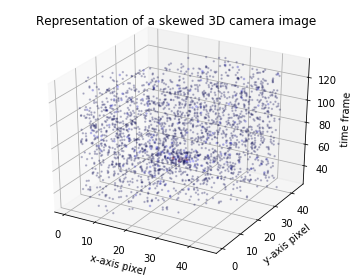

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import json
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

id_position = pickle.load(open("/run/media/jacob/SSD/Development/thesis/jan/07_make_FACT/hexagonal_to_quadratic_mapping_dict.p", "rb"))
path_build = '/home/jbehnken/07_make_FACT/build/'

path_raw_mc = '/net/big-tank/POOL/projects/fact/simulation/photon_stream/fact_tools/v.0.18.0/gamma_gustav_12/'
path_loading = os.path.join(path_raw_mc, os.listdir(path_raw_mc)[-1])

with gzip.open(path_loading) as f:
    for _ in range(8):
        line = next(f)
    event_photons = json.loads(line.decode('utf-8'))['PhotonArrivals_500ps']

    input_matrix = np.zeros([46,45, 100])
    for i in range(1440):
        x, y = id_position[i]
        for j in event_photons[i]:
            input_matrix[int(x)][int(y)][j-30] += 1

    x, y, z = input_matrix.nonzero()

    color = []
    size = []
    for i, j, k in zip(x, y, z):
        color.append(input_matrix[i][j][k])
        size.append(np.log(input_matrix[i][j][k])+2)

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z+30, alpha=0.2, c=color, s=size, cmap='seismic')

    plt.title('Representation of a skewed 3D camera image')
    ax.set_xlabel('x-axis pixel')
    ax.set_ylabel('y-axis pixel')
    ax.set_zlabel('time frame')

    plt.tight_layout()
    plt.savefig(path_build+'3d_Camera_Image.pdf')
    
    plt.show()